读入世界货币基金组织数据集

In [145]:
import pandas as pd
import numpy as np
df = pd.read_csv("./data/WEOOct2022all.csv",thousands=',')
df

,WEO Country/Region Code,ISO,WEO Subject Code,Country/Region,Subject Descriptor,Subject Notes,Units,Scale,Country/Series-specific Notes,1980,...,2019,2020,2021,2022,2023,2024,2025,2026,2027,Estimates Start After
0,512,AFG,NGDP_R,Afghanistan,"Gross domestic product, constant prices",Expressed in billions of national currency uni...,National currency,Billions,Source: National Statistics Office Latest actu...,NaN,...,"1,319.90","1,288.87",NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020.0
1,512,AFG,NGDP_RPCH,Afghanistan,"Gross domestic product, constant prices",Annual percentages of constant price GDP are y...,Percent change,NaN,"See notes for: Gross domestic product, consta...",NaN,...,3.912,-2.351,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020.0
2,512,AFG,NGDP,Afghanistan,"Gross domestic product, current prices",Expressed in billions of national currency uni...,National currency,Billions,Source: National Statistics Office Latest actu...,NaN,...,"1,469.60","1,547.29",NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020.0
3,512,AFG,NGDPD,Afghanistan,"Gross domestic product, current prices",Values are based upon GDP in national currency...,U.S. dollars,Billions,"See notes for: Gross domestic product, curren...",NaN,...,18.876,20.136,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020.0
4,512,AFG,PPPGDP,Afghanistan,"Gross domestic product, current prices",These data form the basis for the country weig...,Purchasing power parity; international dollars,Billions,"See notes for: Gross domestic product, curren...",NaN,...,81.873,80.912,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8619,698,ZWE,GGXWDG,Zimbabwe,General government gross debt,Gross debt consists of all liabilities that re...,National currency,Billions,Source: Ministry of Finance or Treasury Latest...,NaN,...,174.699,"1,218.76","1,947.91","13,347.46","27,224.17","41,501.09","52,964.56","60,566.34","67,806.72",2019.0
8620,698,ZWE,GGXWDG_NGDP,Zimbabwe,General government gross debt,Gross debt consists of all liabilities that re...,Percent of GDP,NaN,See notes for: General government gross debt ...,NaN,...,93.213,102.491,66.913,92.635,64.872,57.489,54.497,53.13,51.395,2019.0
8621,698,ZWE,NGDP_FY,Zimbabwe,Gross domestic product corresponding to fiscal...,Gross domestic product corresponding to fiscal...,National currency,Billions,Source: Ministry of Finance or Treasury Latest...,NaN,...,187.419,"1,189.14","2,911.11","14,408.63","41,965.70","72,190.13","97,188.08","113,996.38","131,931.52",2019.0
8622,698,ZWE,BCA,Zimbabwe,Current account balance,Current account is all transactions other than...,U.S. dollars,Billions,Source: Reserve Bank of Zimbabwe and Ministry ...,-0.301,...,0.92,0.678,0.348,0.215,0.096,0.149,0.206,0.237,0.201,2020.0


计算总行数并提取列名

In [146]:
row_count = df.shape[0]
d_f_notnull = df.count()
d_f_list = df.columns
row_count

8624

查看统计信息并将每个字段的非空数据个数转为字典形式

In [147]:
df.info()
d_f_notnull_dict = d_f_notnull.to_dict()
d_f_notnull_dict

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8624 entries, 0 to 8623
Data columns (total 58 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   WEO Country/Region Code        8624 non-null   int64  
 1   ISO                            8624 non-null   object 
 2   WEO Subject Code               8624 non-null   object 
 3   Country/Region                 8624 non-null   object 
 4   Subject Descriptor             8624 non-null   object 
 5   Subject Notes                  8624 non-null   object 
 6   Units                          8624 non-null   object 
 7   Scale                          3920 non-null   object 
 8   Country/Series-specific Notes  7641 non-null   object 
 9   1980                           3886 non-null   object 
 10  1981                           4007 non-null   object 
 11  1982                           4050 non-null   object 
 12  1983                           4091 non-null   o

{'WEO Country/Region Code': 8624,
 'ISO': 8624,
 'WEO Subject Code': 8624,
 'Country/Region': 8624,
 'Subject Descriptor': 8624,
 'Subject Notes': 8624,
 'Units': 8624,
 'Scale': 3920,
 'Country/Series-specific Notes': 7641,
 '1980': 3886,
 '1981': 4007,
 '1982': 4050,
 '1983': 4091,
 '1984': 4117,
 '1985': 4194,
 '1986': 4241,
 '1987': 4265,
 '1988': 4354,
 '1989': 4415,
 '1990': 4903,
 '1991': 5059,
 '1992': 5443,
 '1993': 5637,
 '1994': 5764,
 '1995': 6106,
 '1996': 6246,
 '1997': 6411,
 '1998': 6583,
 '1999': 6670,
 '2000': 7082,
 '2001': 7221,
 '2002': 7319,
 '2003': 7353,
 '2004': 7429,
 '2005': 7462,
 '2006': 7469,
 '2007': 7471,
 '2008': 7482,
 '2009': 7503,
 '2010': 7515,
 '2011': 7517,
 '2012': 7533,
 '2013': 7549,
 '2014': 7575,
 '2015': 7593,
 '2016': 7595,
 '2017': 7599,
 '2018': 7596,
 '2019': 7594,
 '2020': 7593,
 '2021': 7510,
 '2022': 7443,
 '2023': 7421,
 '2024': 7337,
 '2025': 7337,
 '2026': 7337,
 '2027': 7337,
 'Estimates Start After': 7641}

计算每个字段的空值占比，将空值占比大于50%的全部删除，剩余的加入新的DataFrame

In [148]:
df.describe()

,WEO Country/Region Code,Estimates Start After
count,8624.000000,7641.000000
mean,551.377551,2020.274702
std,261.497924,1.888114
min,111.000000,2003.000000
25%,313.750000,2020.000000
50%,565.500000,2021.000000
75%,733.250000,2021.000000
max,968.000000,2022.000000


In [149]:
df1 = pd.DataFrame()
for feature in d_f_list:
    not_null_count = d_f_notnull_dict[feature]
    null_rate = 1-(not_null_count/row_count)
    if null_rate < 0.5 :
        df1[feature] = df[feature]
df1

,WEO Country/Region Code,ISO,WEO Subject Code,Country/Region,Subject Descriptor,Subject Notes,Units,Country/Series-specific Notes,1988,1989,...,2019,2020,2021,2022,2023,2024,2025,2026,2027,Estimates Start After
0,512,AFG,NGDP_R,Afghanistan,"Gross domestic product, constant prices",Expressed in billions of national currency uni...,National currency,Source: National Statistics Office Latest actu...,NaN,NaN,...,"1,319.90","1,288.87",NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020.0
1,512,AFG,NGDP_RPCH,Afghanistan,"Gross domestic product, constant prices",Annual percentages of constant price GDP are y...,Percent change,"See notes for: Gross domestic product, consta...",NaN,NaN,...,3.912,-2.351,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020.0
2,512,AFG,NGDP,Afghanistan,"Gross domestic product, current prices",Expressed in billions of national currency uni...,National currency,Source: National Statistics Office Latest actu...,NaN,NaN,...,"1,469.60","1,547.29",NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020.0
3,512,AFG,NGDPD,Afghanistan,"Gross domestic product, current prices",Values are based upon GDP in national currency...,U.S. dollars,"See notes for: Gross domestic product, curren...",NaN,NaN,...,18.876,20.136,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020.0
4,512,AFG,PPPGDP,Afghanistan,"Gross domestic product, current prices",These data form the basis for the country weig...,Purchasing power parity; international dollars,"See notes for: Gross domestic product, curren...",NaN,NaN,...,81.873,80.912,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8619,698,ZWE,GGXWDG,Zimbabwe,General government gross debt,Gross debt consists of all liabilities that re...,National currency,Source: Ministry of Finance or Treasury Latest...,NaN,NaN,...,174.699,"1,218.76","1,947.91","13,347.46","27,224.17","41,501.09","52,964.56","60,566.34","67,806.72",2019.0
8620,698,ZWE,GGXWDG_NGDP,Zimbabwe,General government gross debt,Gross debt consists of all liabilities that re...,Percent of GDP,See notes for: General government gross debt ...,NaN,NaN,...,93.213,102.491,66.913,92.635,64.872,57.489,54.497,53.13,51.395,2019.0
8621,698,ZWE,NGDP_FY,Zimbabwe,Gross domestic product corresponding to fiscal...,Gross domestic product corresponding to fiscal...,National currency,Source: Ministry of Finance or Treasury Latest...,NaN,NaN,...,187.419,"1,189.14","2,911.11","14,408.63","41,965.70","72,190.13","97,188.08","113,996.38","131,931.52",2019.0
8622,698,ZWE,BCA,Zimbabwe,Current account balance,Current account is all transactions other than...,U.S. dollars,Source: Reserve Bank of Zimbabwe and Ministry ...,0.05,-0.079,...,0.92,0.678,0.348,0.215,0.096,0.149,0.206,0.237,0.201,2020.0


对subject descripitor 进行取值的类型统计

In [150]:
df1[['Subject Notes','Subject Descriptor']].value_counts()

Subject Notes                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           

取出代表GDP指标的表项，可以得到一个各国历年GDP数值的表格

In [151]:

dfGDP = pd.DataFrame(columns=df1.columns)
for i in range(df1.shape[0]):
    if df1['WEO Subject Code'].loc[i] == 'NGDPRPPPPC':
        dfGDP.loc[len(dfGDP.index)] = df1.loc[i]

dfGDP


,WEO Country/Region Code,ISO,WEO Subject Code,Country/Region,Subject Descriptor,Subject Notes,Units,Country/Series-specific Notes,1988,1989,...,2019,2020,2021,2022,2023,2024,2025,2026,2027,Estimates Start After
0,512,AFG,NGDPRPPPPC,Afghanistan,"Gross domestic product per capita, constant pr...",GDP is expressed in constant international dol...,Purchasing power parity; 2017 international do...,"See notes for: Gross domestic product, consta...",NaN,NaN,...,"2,439.68","2,328.76",NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.0
1,914,ALB,NGDPRPPPPC,Albania,"Gross domestic product per capita, constant pr...",GDP is expressed in constant international dol...,Purchasing power parity; 2017 international do...,"See notes for: Gross domestic product, consta...","5,392.59","5,764.04",...,"13,862.63","13,394.46","14,559.68","15,176.70","15,599.44","16,148.12","16,718.77","17,345.89","18,000.73",2020.0
2,612,DZA,NGDPRPPPPC,Algeria,"Gross domestic product per capita, constant pr...",GDP is expressed in constant international dol...,Purchasing power parity; 2017 international do...,"See notes for: Gross domestic product, consta...","8,882.79","9,083.03",...,"11,434.87","10,746.03","10,969.25","11,323.13","11,454.28","11,519.13","11,571.31","11,627.29","11,661.52",2019.0
3,171,AND,NGDPRPPPPC,Andorra,"Gross domestic product per capita, constant pr...",GDP is expressed in constant international dol...,Purchasing power parity; 2017 international do...,"See notes for: Gross domestic product, consta...",NaN,NaN,...,"56,330.95","49,728.24","53,143.21","55,554.98","55,583.13","55,829.37","55,912.42","55,776.22","55,530.93",2021.0
4,614,AGO,NGDPRPPPPC,Angola,"Gross domestic product per capita, constant pr...",GDP is expressed in constant international dol...,Purchasing power parity; 2017 international do...,"See notes for: Gross domestic product, consta...","2,974.02","2,895.84",...,"7,084.18","6,482.35","6,344.15","6,335.91","6,362.17","6,416.25","6,480.06","6,549.51","6,608.36",2017.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,582,VNM,NGDPRPPPPC,Vietnam,"Gross domestic product per capita, constant pr...",GDP is expressed in constant international dol...,Purchasing power parity; 2017 international do...,"See notes for: Gross domestic product, consta...","1,916.31","2,025.15",...,"10,131.71","10,312.54","10,479.70","11,111.57","11,692.57","12,354.54","13,076.87","13,852.30","14,692.12",2020.0
192,487,WBG,NGDPRPPPPC,West Bank and Gaza,"Gross domestic product per capita, constant pr...",GDP is expressed in constant international dol...,Purchasing power parity; 2017 international do...,"See notes for: Gross domestic product, consta...",NaN,NaN,...,"5,879.79","5,087.06","5,314.41","5,400.02","5,462.49","5,469.19","5,459.45","5,452.40","5,448.00",2021.0
193,474,YEM,NGDPRPPPPC,Yemen,"Gross domestic product per capita, constant pr...",GDP is expressed in constant international dol...,Purchasing power parity; 2017 international do...,"See notes for: Gross domestic product, consta...",NaN,NaN,...,"2,097.44","1,876.94","1,818.16","1,815.48","1,835.91","1,924.91","2,009.72","2,089.38","2,162.91",2018.0
194,754,ZMB,NGDPRPPPPC,Zambia,"Gross domestic product per capita, constant pr...",GDP is expressed in constant international dol...,Purchasing power parity; 2017 international do...,"See notes for: Gross domestic product, consta...","2,661.39","2,487.76",...,"3,383.31","3,191.37","3,239.65","3,236.21","3,268.17","3,307.09","3,359.12","3,417.66","3,485.58",2019.0


<Figure size 1200x1000 with 0 Axes>

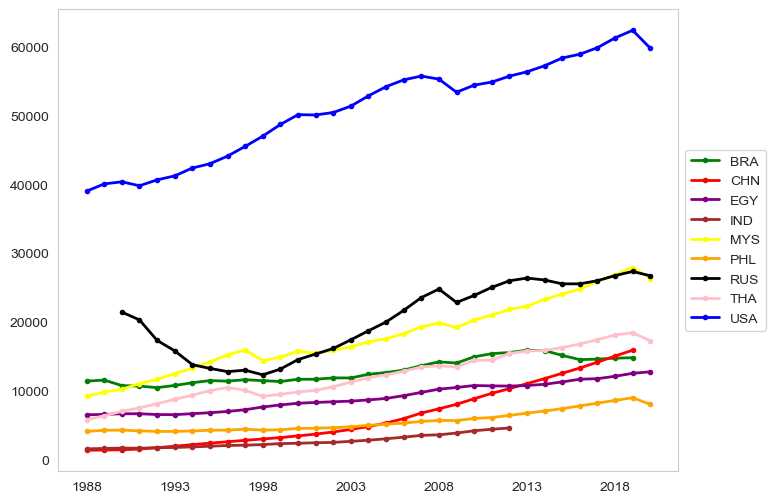

['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan', 'The Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Democratic Republic of the Congo', 'Republic of Congo', 'Costa Rica', "C魌e d'Ivoire", 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'The Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras', 'Hong Kong SAR', 'Hungary', 'Iceland', '

In [152]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
GDPRate = []
s_ = np.array([])
temp = 0
country_list = []
ISO_list = []
NaN = dfGDP['1988'].loc[0]
plt.figure(figsize=(12, 10))
fig,ax = plt.subplots(figsize=(8,6))
for i in range(dfGDP.shape[0]):
    s = 1988
    while s<2028 :
        temp = dfGDP[str(s)].loc[i]
        if isinstance(temp,str):
            temp = float(temp.replace(',', ''))
        if np.isnan(temp) :
            s+=1
        else:
            break
    name = dfGDP['ISO'].loc[i]
    countryName = dfGDP['Country/Region'].loc[i]
    country_list.append(countryName)
    ISO_list.append(name)
    if s == 2028:
        GDPRate.append(0)
        continue
    s_ = np.array([])
    y_ = np.array([])
    for j in range(s,int(dfGDP['Estimates Start After'].loc[i])):
        s_ = np.append(s_,float(dfGDP[str(j)].loc[i].replace(',', '')))
        y_ = np.append(y_,str(j))
    if name == 'USA':
        plt.plot(y_, s_, color='blue',marker='.',  linewidth=2 , label=name)
        plt.legend(loc='center left',bbox_to_anchor=(1,0.5))
    if name == 'CHN':
        plt.plot(y_, s_, color='red',marker='.',  linewidth=2, label=name)
        plt.legend(loc='center left',bbox_to_anchor=(1,0.5))
    if name == 'MYS':
        plt.plot(y_, s_, color='yellow',marker='.',  linewidth=2, label=name)
        plt.legend(loc='center left',bbox_to_anchor=(1,0.5))
    if name == 'BRA':
        plt.plot(y_, s_, color='green',marker='.',  linewidth=2, label=name)
        plt.legend(loc='center left',bbox_to_anchor=(1,0.5))
    if name == 'EGY':
        plt.plot(y_, s_, color='purple',marker='.', linewidth=2, label=name)
        plt.legend(loc='center left',bbox_to_anchor=(1,0.5))
    if name == 'IND':
        plt.plot(y_, s_, color='brown',marker='.',  linewidth=2, label=name)
        plt.legend(loc='center left',bbox_to_anchor=(1,0.5))
    if name == 'PHL':
        plt.plot(y_, s_, color='orange',marker='.',  linewidth=2, label=name)
        plt.legend(loc='center left',bbox_to_anchor=(1,0.5))
    if name == 'RUS':
        plt.plot(y_, s_, color='black',marker='.',  linewidth=2, label=name)
        plt.legend(loc='center left',bbox_to_anchor=(1,0.5))
    if name == 'THA':
        plt.plot(y_, s_, color='pink',marker='.',  linewidth=2, label=name)
        plt.legend(loc='center left',bbox_to_anchor=(1,0.5))
    if s_.size != 0:
        GDPRate.append(((s_[-1] - s_[0]) / s_.size)/s_[0])
    else:
        GDPRate.append(0)
ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
plt.grid(False)
plt.show()

print(country_list,ISO_list)

In [153]:
    len(ISO_list)

196

In [154]:
df_list = df1['WEO Subject Code'].unique()
df_list = list(df_list)
df_list

['NGDP_R',
 'NGDP_RPCH',
 'NGDP',
 'NGDPD',
 'PPPGDP',
 'NGDP_D',
 'NGDPRPC',
 'NGDPRPPPPC',
 'NGDPPC',
 'NGDPDPC',
 'PPPPC',
 'NGAP_NPGDP',
 'PPPSH',
 'PPPEX',
 'NID_NGDP',
 'NGSD_NGDP',
 'PCPI',
 'PCPIPCH',
 'PCPIE',
 'PCPIEPCH',
 'TM_RPCH',
 'TMG_RPCH',
 'TX_RPCH',
 'TXG_RPCH',
 'LUR',
 'LE',
 'LP',
 'GGR',
 'GGR_NGDP',
 'GGX',
 'GGX_NGDP',
 'GGXCNL',
 'GGXCNL_NGDP',
 'GGSB',
 'GGSB_NPGDP',
 'GGXONLB',
 'GGXONLB_NGDP',
 'GGXWDN',
 'GGXWDN_NGDP',
 'GGXWDG',
 'GGXWDG_NGDP',
 'NGDP_FY',
 'BCA',
 'BCA_NGDPD']

In [155]:
df_list_1 = ['ISO3','Country/Region','GDPMeanGrowingRate'] + df_list + ['RenewableEnergy']
df_eco = pd.DataFrame(columns=df_list_1)
df_eco['ISO3'] = ISO_list
df_eco['Country/Region'] = country_list
df_eco['GDPMeanGrowingRate'] = GDPRate
df_eco

,ISO3,Country/Region,GDPMeanGrowingRate,NGDP_R,NGDP_RPCH,NGDP,NGDPD,PPPGDP,NGDP_D,NGDPRPC,...,GGXONLB,GGXONLB_NGDP,GGXWDN,GGXWDN_NGDP,GGXWDG,GGXWDG_NGDP,NGDP_FY,BCA,BCA_NGDPD,RenewableEnergy
0,AFG,Afghanistan,0.038718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ALB,Albania,0.049084,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,DZA,Algeria,0.009674,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AND,Andorra,-0.016145,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AGO,Angola,0.057477,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,VNM,Vietnam,0.133972,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
192,WBG,West Bank and Gaza,0.009650,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
193,YEM,Yemen,-0.012389,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
194,ZMB,Zambia,0.009414,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [156]:

for i in range(df1.shape[0]):
    if np.isnan(df1['Estimates Start After'].loc[i]):
        continue
    last_valid = str(int(df1['Estimates Start After'].loc[i])-1)
    col_name = df1['WEO Subject Code'].loc[i]
    countryISO = df1['ISO'].loc[i]
    row_index = df_eco[df_eco.ISO3 == countryISO].index.tolist()[0]
    df_eco[col_name].loc[row_index] = df1[last_valid].loc[i]
df_eco

C:\Users\wythedee\AppData\Local\Temp\ipykernel_17860\679866099.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_eco[col_name].loc[row_index] = df1[last_valid].loc[i]


,ISO3,Country/Region,GDPMeanGrowingRate,NGDP_R,NGDP_RPCH,NGDP,NGDPD,PPPGDP,NGDP_D,NGDPRPC,...,GGXONLB,GGXONLB_NGDP,GGXWDN,GGXWDN_NGDP,GGXWDG,GGXWDG_NGDP,NGDP_FY,BCA,BCA_NGDPD,RenewableEnergy
0,AFG,Afghanistan,0.038718,"1,319.90",3.912,"1,469.60",18.876,81.873,111.341,"40,196.70",...,-14.971,-1.019,NaN,NaN,90.092,6.13,"1,469.60",2.209,11.705,NaN
1,ALB,Albania,0.049084,837.786,2.088,"1,691.90",15.399,41.623,201.949,"290,805.66",...,2.249,0.133,"1,022.14",60.413,"1,138.40",67.285,"1,691.90",-1.166,-7.571,NaN
2,DZA,Algeria,0.009674,"7,156.87",-5.1,"18,383.80",144.922,497.03,256.869,"175,368.05",...,"-2,142.61",-11.655,"8,098.51",44.052,"9,609.71",52.273,"18,383.80",-18.711,-12.911,NaN
3,AND,Andorra,-0.016145,2.375,-11.184,2.531,2.885,4.092,106.557,"30,447.35",...,NaN,NaN,NaN,NaN,1.173,46.329,2.531,0.568,18.01,NaN
4,AGO,Angola,0.057477,"1,465.30",-5.75,"33,611.36",58.125,212.172,"2,293.82","57,774.09",...,"1,661.67",4.944,NaN,NaN,"45,892.99",136.54,"33,611.36",0.872,1.5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,VNM,Vietnam,0.133972,"4,987,353.63",2.944,"7,966,121.55",342.941,"1,061.44",159.726,"50,212,809.39",...,"-123,697.19",-1.553,NaN,NaN,"3,319,350.36",41.668,"7,966,121.55",15.06,4.392,NaN
192,WBG,West Bank and Gaza,0.009650,54.561,-11.318,53.466,15.532,27.371,97.994,"10,695.83",...,NaN,NaN,NaN,NaN,25.172,47.08,53.466,-1.903,-12.25,NaN
193,YEM,Yemen,-0.012389,230.77,1.4,"12,606.26",21.888,64.661,"5,462.70","7,995.78",...,-712.971,-5.656,"9,560.45",75.839,"9,647.20",76.527,"12,606.26",-0.842,-3.846,NaN
194,ZMB,Zambia,0.009414,137.755,-2.785,332.223,18.111,63.559,241.17,"7,859.57",...,-26.027,-7.834,458.771,138.091,465.812,140.211,332.223,2.181,12.041,NaN


In [157]:
d_f_notnull_dict1 = (df_eco.count()).to_dict()
df_eco_1 = pd.DataFrame()
for feature in df_list_1:
    not_null_count = d_f_notnull_dict1[feature]
    null_rate = 1-(not_null_count/df_eco.shape[0])
    if null_rate < 0.5 :
        df_eco_1[feature] = df_eco[feature]
df_eco_1

,ISO3,Country/Region,GDPMeanGrowingRate,NGDP_R,NGDP_RPCH,NGDP,NGDPD,PPPGDP,NGDP_D,NGDPRPC,...,GGX_NGDP,GGXCNL,GGXCNL_NGDP,GGXONLB,GGXONLB_NGDP,GGXWDG,GGXWDG_NGDP,NGDP_FY,BCA,BCA_NGDPD
0,AFG,Afghanistan,0.038718,"1,319.90",3.912,"1,469.60",18.876,81.873,111.341,"40,196.70",...,27.999,-15.55,-1.058,-14.971,-1.019,90.092,6.13,"1,469.60",2.209,11.705
1,ALB,Albania,0.049084,837.786,2.088,"1,691.90",15.399,41.623,201.949,"290,805.66",...,29.153,-32.894,-1.944,2.249,0.133,"1,138.40",67.285,"1,691.90",-1.166,-7.571
2,DZA,Algeria,0.009674,"7,156.87",-5.1,"18,383.80",144.922,497.03,256.869,"175,368.05",...,42.643,"-2,198.53",-11.959,"-2,142.61",-11.655,"9,609.71",52.273,"18,383.80",-18.711,-12.911
3,AND,Andorra,-0.016145,2.375,-11.184,2.531,2.885,4.092,106.557,"30,447.35",...,43.445,-0.075,-2.96,NaN,NaN,1.173,46.329,2.531,0.568,18.01
4,AGO,Angola,0.057477,"1,465.30",-5.75,"33,611.36",58.125,212.172,"2,293.82","57,774.09",...,22.882,-638.098,-1.898,"1,661.67",4.944,"45,892.99",136.54,"33,611.36",0.872,1.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,VNM,Vietnam,0.133972,"4,987,353.63",2.944,"7,966,121.55",342.941,"1,061.44",159.726,"50,212,809.39",...,21.46,"-230,163.19",-2.889,"-123,697.19",-1.553,"3,319,350.36",41.668,"7,966,121.55",15.06,4.392
192,WBG,West Bank and Gaza,0.009650,54.561,-11.318,53.466,15.532,27.371,97.994,"10,695.83",...,32.631,-3.942,-7.373,NaN,NaN,25.172,47.08,53.466,-1.903,-12.25
193,YEM,Yemen,-0.012389,230.77,1.4,"12,606.26",21.888,64.661,"5,462.70","7,995.78",...,13.207,-741.971,-5.886,-712.971,-5.656,"9,647.20",76.527,"12,606.26",-0.842,-3.846
194,ZMB,Zambia,0.009414,137.755,-2.785,332.223,18.111,63.559,241.17,"7,859.57",...,34.081,-45.789,-13.783,-26.027,-7.834,465.812,140.211,332.223,2.181,12.041


代码功能见energy.ipynb

In [158]:
import pandas as pd

df = pd.read_csv("./data/Energy_Transition.csv")
df = df.fillna(0)
df = df.drop(['ISO2', 'ObjectId', 'CTS_Name', 'CTS_Code', 'CTS_Full_Descriptor'], axis=1)

df_2020 = df[['Country/Region', 'ISO3', 'Energy_Type', 'Unit', 'F2020']]

df_energy = pd.DataFrame(columns=df_2020.columns)
for i in range(0, df_2020.shape[0]):
    if df_2020['Unit'].loc[i] == 'Gigawatt-hours (GWh)':
        df_energy = df_energy.append(df_2020.loc[i], ignore_index=True)

df_e1 = df_energy.groupby(['ISO3', 'Energy_Type'], as_index=False).agg({'F2020': 'sum'})

df_e2 = df_e1.groupby(['ISO3'], as_index=False).agg({'F2020': 'sum'})

df_e3 = pd.DataFrame(columns=df_e1.columns)
for i in range(0, df_e1.shape[0]):
    if df_e1['Energy_Type'].loc[i] == 'Total Renewable':
        df_e3 = df_e3.append(df_e1.loc[i], ignore_index=True)
df_e3 = df_e3.drop('Energy_Type', axis=1)
df_e3.columns = ['ISO', 'Renewable']


df_e = df_e2.set_index('ISO3').join(df_e3.set_index('ISO'))
df_e = df_e.reset_index()
df_e.columns = ['ISO', 'Total', 'Renewable']
df_e['Ratio'] = df_e['Renewable'] / df_e['Total']
df_e

C:\Users\wythedee\AppData\Local\Temp\ipykernel_17860\1628653898.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_energy = df_energy.append(df_2020.loc[i], ignore_index=True)
C:\Users\wythedee\AppData\Local\Temp\ipykernel_17860\1628653898.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_energy = df_energy.append(df_2020.loc[i], ignore_index=True)
C:\Users\wythedee\AppData\Local\Temp\ipykernel_17860\1628653898.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_energy = df_energy.append(df_2020.loc[i], ignore_index=True)
C:\Users\wythedee\AppData\Local\Temp\ipykernel_17860\1628653898.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

,ISO,Total,Renewable,Ratio
0,ABW,9.736280e+02,147.104,0.151089
1,AETMP,9.995379e+06,2799010.198,0.280030
2,AFG,1.248281e+03,1115.393,0.893543
3,AGO,1.901611e+04,14019.943,0.737267
4,AIA,1.084410e+02,2.629,0.024244
...,...,...,...,...
242,XKX,6.711249e+03,363.586,0.054176
243,YEM,3.608674e+03,489.674,0.135694
244,ZAF,2.128391e+05,9551.288,0.044876
245,ZMB,1.525240e+04,13036.318,0.854706


In [159]:
df_total = df_e.set_index('ISO').join(df_eco_1.set_index('ISO3'))
df_total

,Total,Renewable,Ratio,Country/Region,GDPMeanGrowingRate,NGDP_R,NGDP_RPCH,NGDP,NGDPD,PPPGDP,...,GGX_NGDP,GGXCNL,GGXCNL_NGDP,GGXONLB,GGXONLB_NGDP,GGXWDG,GGXWDG_NGDP,NGDP_FY,BCA,BCA_NGDPD
ISO,,,,,,,,,,,,,,,,,,,,,
ABW,9.736280e+02,147.104,0.151089,Aruba,0.012317,4.696,-18.585,4.672,2.61,3.728,...,38.957,-0.749,-16.028,-0.514,-11.011,5.146,110.139,4.672,-0.338,-12.959
AETMP,9.995379e+06,2799010.198,0.280030,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AFG,1.248281e+03,1115.393,0.893543,Afghanistan,0.038718,"1,319.90",3.912,"1,469.60",18.876,81.873,...,27.999,-15.55,-1.058,-14.971,-1.019,90.092,6.13,"1,469.60",2.209,11.705
AGO,1.901611e+04,14019.943,0.737267,Angola,0.057477,"1,465.30",-5.75,"33,611.36",58.125,212.172,...,22.882,-638.098,-1.898,"1,661.67",4.944,"45,892.99",136.54,"33,611.36",0.872,1.5
AIA,1.084410e+02,2.629,0.024244,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
XKX,6.711249e+03,363.586,0.054176,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YEM,3.608674e+03,489.674,0.135694,Yemen,-0.012389,230.77,1.4,"12,606.26",21.888,64.661,...,13.207,-741.971,-5.886,-712.971,-5.656,"9,647.20",76.527,"12,606.26",-0.842,-3.846
ZAF,2.128391e+05,9551.288,0.044876,South Africa,0.002904,"4,293.36",-6.342,"5,556.92",337.521,794.871,...,34.638,-537.472,-9.672,-310.58,-5.589,"3,834.25",69,"5,556.92",6.656,1.972


In [160]:
df_total.dropna(thresh=40, inplace=True)
df_total = df_total.drop('VEN',axis=0)
df_total

,Total,Renewable,Ratio,Country/Region,GDPMeanGrowingRate,NGDP_R,NGDP_RPCH,NGDP,NGDPD,PPPGDP,...,GGX_NGDP,GGXCNL,GGXCNL_NGDP,GGXONLB,GGXONLB_NGDP,GGXWDG,GGXWDG_NGDP,NGDP_FY,BCA,BCA_NGDPD
ISO,,,,,,,,,,,,,,,,,,,,,
AFG,1248.281000,1115.393,0.893543,Afghanistan,0.038718,"1,319.90",3.912,"1,469.60",18.876,81.873,...,27.999,-15.55,-1.058,-14.971,-1.019,90.092,6.13,"1,469.60",2.209,11.705
AGO,19016.106617,14019.943,0.737267,Angola,0.057477,"1,465.30",-5.75,"33,611.36",58.125,212.172,...,22.882,-638.098,-1.898,"1,661.67",4.944,"45,892.99",136.54,"33,611.36",0.872,1.5
ALB,5313.166000,5313.166,1.000000,Albania,0.049084,837.786,2.088,"1,691.90",15.399,41.623,...,29.153,-32.894,-1.944,2.249,0.133,"1,138.40",67.285,"1,691.90",-1.166,-7.571
ARE,137319.803000,5485.563,0.039947,United Arab Emirates,-0.002964,"1,511.61",3.412,"1,532.22",417.216,695.122,...,33.103,-68.418,-5.191,-64.59,-4.901,522.86,39.672,"1,317.95",21.103,8.945
ARG,149937.547000,43049.275,0.287115,Argentina,0.017273,693.224,-2.001,"21,802.26",451.815,"1,033.74",...,42.059,"-2,360.20",-8.588,"-1,697.96",-6.179,"28,248.09",102.79,"27,481.44",-3.521,-0.779
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VCT,151.686000,26.676,0.175863,St. Vincent and the Grenadines,0.031214,2.397,0.404,2.457,0.91,1.552,...,33.717,-0.124,-5.286,-0.083,-3.536,1.866,79.245,2.355,-0.131,-3.066
VNM,232388.571000,92280.614,0.397096,Vietnam,0.133972,"4,987,353.63",2.944,"7,966,121.55",342.941,"1,061.44",...,21.46,"-230,163.19",-2.889,"-123,697.19",-1.553,"3,319,350.36",41.668,"7,966,121.55",15.06,4.392
YEM,3608.674000,489.674,0.135694,Yemen,-0.012389,230.77,1.4,"12,606.26",21.888,64.661,...,13.207,-741.971,-5.886,-712.971,-5.656,"9,647.20",76.527,"12,606.26",-0.842,-3.846


In [161]:
df_list_2 = list(df_total)
df_list_2.remove('Country/Region')
df_list_2

['Total',
 'Renewable',
 'Ratio',
 'GDPMeanGrowingRate',
 'NGDP_R',
 'NGDP_RPCH',
 'NGDP',
 'NGDPD',
 'PPPGDP',
 'NGDP_D',
 'NGDPRPC',
 'NGDPRPPPPC',
 'NGDPPC',
 'NGDPDPC',
 'PPPPC',
 'PPPSH',
 'PPPEX',
 'NID_NGDP',
 'NGSD_NGDP',
 'PCPI',
 'PCPIPCH',
 'PCPIE',
 'PCPIEPCH',
 'TM_RPCH',
 'TMG_RPCH',
 'TX_RPCH',
 'TXG_RPCH',
 'LUR',
 'LP',
 'GGR',
 'GGR_NGDP',
 'GGX',
 'GGX_NGDP',
 'GGXCNL',
 'GGXCNL_NGDP',
 'GGXONLB',
 'GGXONLB_NGDP',
 'GGXWDG',
 'GGXWDG_NGDP',
 'NGDP_FY',
 'BCA',
 'BCA_NGDPD']

In [162]:
def convert_float(a):
    if a == '--':
        return 0
    else:
        return float(a)

for fea in df_list_2:
    df_total[fea] =df_total[fea].apply(lambda x: convert_float(str(x).replace(',', '')))
df_total

,Total,Renewable,Ratio,Country/Region,GDPMeanGrowingRate,NGDP_R,NGDP_RPCH,NGDP,NGDPD,PPPGDP,...,GGX_NGDP,GGXCNL,GGXCNL_NGDP,GGXONLB,GGXONLB_NGDP,GGXWDG,GGXWDG_NGDP,NGDP_FY,BCA,BCA_NGDPD
ISO,,,,,,,,,,,,,,,,,,,,,
AFG,1248.281000,1115.393,0.893543,Afghanistan,0.038718,1319.900,3.912,1469.600,18.876,81.873,...,27.999,-15.550,-1.058,-14.971,-1.019,90.092,6.130,1469.600,2.209,11.705
AGO,19016.106617,14019.943,0.737267,Angola,0.057477,1465.300,-5.750,33611.360,58.125,212.172,...,22.882,-638.098,-1.898,1661.670,4.944,45892.990,136.540,33611.360,0.872,1.500
ALB,5313.166000,5313.166,1.000000,Albania,0.049084,837.786,2.088,1691.900,15.399,41.623,...,29.153,-32.894,-1.944,2.249,0.133,1138.400,67.285,1691.900,-1.166,-7.571
ARE,137319.803000,5485.563,0.039947,United Arab Emirates,-0.002964,1511.610,3.412,1532.220,417.216,695.122,...,33.103,-68.418,-5.191,-64.590,-4.901,522.860,39.672,1317.950,21.103,8.945
ARG,149937.547000,43049.275,0.287115,Argentina,0.017273,693.224,-2.001,21802.260,451.815,1033.740,...,42.059,-2360.200,-8.588,-1697.960,-6.179,28248.090,102.790,27481.440,-3.521,-0.779
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VCT,151.686000,26.676,0.175863,St. Vincent and the Grenadines,0.031214,2.397,0.404,2.457,0.910,1.552,...,33.717,-0.124,-5.286,-0.083,-3.536,1.866,79.245,2.355,-0.131,-3.066
VNM,232388.571000,92280.614,0.397096,Vietnam,0.133972,4987353.630,2.944,7966121.550,342.941,1061.440,...,21.460,-230163.190,-2.889,-123697.190,-1.553,3319350.360,41.668,7966121.550,15.060,4.392
YEM,3608.674000,489.674,0.135694,Yemen,-0.012389,230.770,1.400,12606.260,21.888,64.661,...,13.207,-741.971,-5.886,-712.971,-5.656,9647.200,76.527,12606.260,-0.842,-3.846


In [163]:
df_total = df_total.fillna(0)
df_total

,Total,Renewable,Ratio,Country/Region,GDPMeanGrowingRate,NGDP_R,NGDP_RPCH,NGDP,NGDPD,PPPGDP,...,GGX_NGDP,GGXCNL,GGXCNL_NGDP,GGXONLB,GGXONLB_NGDP,GGXWDG,GGXWDG_NGDP,NGDP_FY,BCA,BCA_NGDPD
ISO,,,,,,,,,,,,,,,,,,,,,
AFG,1248.281000,1115.393,0.893543,Afghanistan,0.038718,1319.900,3.912,1469.600,18.876,81.873,...,27.999,-15.550,-1.058,-14.971,-1.019,90.092,6.130,1469.600,2.209,11.705
AGO,19016.106617,14019.943,0.737267,Angola,0.057477,1465.300,-5.750,33611.360,58.125,212.172,...,22.882,-638.098,-1.898,1661.670,4.944,45892.990,136.540,33611.360,0.872,1.500
ALB,5313.166000,5313.166,1.000000,Albania,0.049084,837.786,2.088,1691.900,15.399,41.623,...,29.153,-32.894,-1.944,2.249,0.133,1138.400,67.285,1691.900,-1.166,-7.571
ARE,137319.803000,5485.563,0.039947,United Arab Emirates,-0.002964,1511.610,3.412,1532.220,417.216,695.122,...,33.103,-68.418,-5.191,-64.590,-4.901,522.860,39.672,1317.950,21.103,8.945
ARG,149937.547000,43049.275,0.287115,Argentina,0.017273,693.224,-2.001,21802.260,451.815,1033.740,...,42.059,-2360.200,-8.588,-1697.960,-6.179,28248.090,102.790,27481.440,-3.521,-0.779
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VCT,151.686000,26.676,0.175863,St. Vincent and the Grenadines,0.031214,2.397,0.404,2.457,0.910,1.552,...,33.717,-0.124,-5.286,-0.083,-3.536,1.866,79.245,2.355,-0.131,-3.066
VNM,232388.571000,92280.614,0.397096,Vietnam,0.133972,4987353.630,2.944,7966121.550,342.941,1061.440,...,21.460,-230163.190,-2.889,-123697.190,-1.553,3319350.360,41.668,7966121.550,15.060,4.392
YEM,3608.674000,489.674,0.135694,Yemen,-0.012389,230.770,1.400,12606.260,21.888,64.661,...,13.207,-741.971,-5.886,-712.971,-5.656,9647.200,76.527,12606.260,-0.842,-3.846


In [164]:
df_total.describe()

,Total,Renewable,Ratio,GDPMeanGrowingRate,NGDP_R,NGDP_RPCH,NGDP,NGDPD,PPPGDP,NGDP_D,...,GGX_NGDP,GGXCNL,GGXCNL_NGDP,GGXONLB,GGXONLB_NGDP,GGXWDG,GGXWDG_NGDP,NGDP_FY,BCA,BCA_NGDPD
count,1.720000e+02,1.720000e+02,172.000000,172.000000,1.720000e+02,172.000000,1.720000e+02,172.000000,172.000000,172.000000,...,172.000000,1.720000e+02,172.000000,1.720000e+02,172.000000,1.720000e+02,172.000000,1.720000e+02,172.000000,172.000000
mean,1.546917e+05,4.283601e+04,0.375905,0.039241,2.137142e+05,-1.571866,5.645243e+05,502.733140,777.703430,407.581558,...,33.411733,-2.225515e+04,-5.417936,-1.820384e+04,-3.694866,1.866194e+05,66.792110,4.135196e+05,1.841866,-2.265721
std,6.949690e+05,1.851108e+05,0.319622,0.126642,1.469534e+06,6.749948,5.249097e+06,2035.782046,2635.582906,2117.395576,...,14.107746,1.934468e+05,4.113291,1.708645e+05,3.877143,1.469512e+06,38.839724,3.370046e+06,58.829059,9.518832
min,2.667300e+01,0.000000e+00,0.000000,-0.016147,1.830000e-01,-24.365000,2.560000e-01,0.178000,0.233000,76.149000,...,9.881000,-2.352077e+06,-16.544000,-2.152159e+06,-15.766000,5.100000e-02,0.997000,2.560000e-01,-619.698000,-34.360000
25%,2.211188e+03,3.390895e+02,0.095679,0.009240,6.543550e+01,-5.540000,1.144973e+02,12.105000,29.819250,105.488750,...,23.797000,-6.589070e+02,-7.907250,-3.405025e+02,-5.654500,5.599850e+01,42.088500,1.144973e+02,-1.872000,-5.958750
50%,1.516371e+04,4.228204e+03,0.276070,0.020626,8.379605e+02,-1.916500,1.420320e+03,47.482500,103.839500,117.051000,...,32.805500,-5.030700e+01,-5.360000,-2.505550e+01,-3.754000,8.492860e+02,58.766000,1.395405e+03,-0.298500,-1.716000
75%,7.247251e+04,1.962884e+04,0.637818,0.039178,7.196427e+03,2.286750,1.027253e+04,278.810000,484.465500,157.097000,...,41.628500,-3.014500e+00,-2.851500,-1.039000e+00,-1.718250,6.996530e+03,79.323500,1.021862e+04,0.968000,2.159250
max,7.780166e+06,2.149534e+06,1.000000,1.613851,1.524416e+07,43.480000,6.677450e+07,20893.750000,24168.030000,26552.640000,...,132.573000,3.259900e+03,5.378000,3.626460e+03,6.821000,1.798198e+07,236.277000,4.079138e+07,272.471000,48.774000


In [165]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
Index: 172 entries, AFG to ZMB
Data columns (total 43 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Total               172 non-null    float64
 1   Renewable           172 non-null    float64
 2   Ratio               172 non-null    float64
 3   Country/Region      172 non-null    object 
 4   GDPMeanGrowingRate  172 non-null    float64
 5   NGDP_R              172 non-null    float64
 6   NGDP_RPCH           172 non-null    float64
 7   NGDP                172 non-null    float64
 8   NGDPD               172 non-null    float64
 9   PPPGDP              172 non-null    float64
 10  NGDP_D              172 non-null    float64
 11  NGDPRPC             172 non-null    float64
 12  NGDPRPPPPC          172 non-null    float64
 13  NGDPPC              172 non-null    float64
 14  NGDPDPC             172 non-null    float64
 15  PPPPC               172 non-null    float64
 16  PPPSH      

In [166]:
df_total_clean = df_total.drop('Country/Region',axis=1)
df_total_clean

,Total,Renewable,Ratio,GDPMeanGrowingRate,NGDP_R,NGDP_RPCH,NGDP,NGDPD,PPPGDP,NGDP_D,...,GGX_NGDP,GGXCNL,GGXCNL_NGDP,GGXONLB,GGXONLB_NGDP,GGXWDG,GGXWDG_NGDP,NGDP_FY,BCA,BCA_NGDPD
ISO,,,,,,,,,,,,,,,,,,,,,
AFG,1248.281000,1115.393,0.893543,0.038718,1319.900,3.912,1469.600,18.876,81.873,111.341,...,27.999,-15.550,-1.058,-14.971,-1.019,90.092,6.130,1469.600,2.209,11.705
AGO,19016.106617,14019.943,0.737267,0.057477,1465.300,-5.750,33611.360,58.125,212.172,2293.820,...,22.882,-638.098,-1.898,1661.670,4.944,45892.990,136.540,33611.360,0.872,1.500
ALB,5313.166000,5313.166,1.000000,0.049084,837.786,2.088,1691.900,15.399,41.623,201.949,...,29.153,-32.894,-1.944,2.249,0.133,1138.400,67.285,1691.900,-1.166,-7.571
ARE,137319.803000,5485.563,0.039947,-0.002964,1511.610,3.412,1532.220,417.216,695.122,101.364,...,33.103,-68.418,-5.191,-64.590,-4.901,522.860,39.672,1317.950,21.103,8.945
ARG,149937.547000,43049.275,0.287115,0.017273,693.224,-2.001,21802.260,451.815,1033.740,3145.050,...,42.059,-2360.200,-8.588,-1697.960,-6.179,28248.090,102.790,27481.440,-3.521,-0.779
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VCT,151.686000,26.676,0.175863,0.031214,2.397,0.404,2.457,0.910,1.552,102.506,...,33.717,-0.124,-5.286,-0.083,-3.536,1.866,79.245,2.355,-0.131,-3.066
VNM,232388.571000,92280.614,0.397096,0.133972,4987353.630,2.944,7966121.550,342.941,1061.440,159.726,...,21.460,-230163.190,-2.889,-123697.190,-1.553,3319350.360,41.668,7966121.550,15.060,4.392
YEM,3608.674000,489.674,0.135694,-0.012389,230.770,1.400,12606.260,21.888,64.661,5462.700,...,13.207,-741.971,-5.886,-712.971,-5.656,9647.200,76.527,12606.260,-0.842,-3.846


In [167]:
df_corr = df_total_clean.corr()
df_corr

,Total,Renewable,Ratio,GDPMeanGrowingRate,NGDP_R,NGDP_RPCH,NGDP,NGDPD,PPPGDP,NGDP_D,...,GGX_NGDP,GGXCNL,GGXCNL_NGDP,GGXONLB,GGXONLB_NGDP,GGXWDG,GGXWDG_NGDP,NGDP_FY,BCA,BCA_NGDPD
Total,1.000000,0.965036,-0.069343,0.141948,0.038524,0.025725,0.028090,0.889272,0.961046,-0.023863,...,0.065534,-0.029937,-0.120153,-0.028785,-0.138837,0.037831,0.084826,0.031357,-0.060992,0.065174
Renewable,0.965036,1.000000,0.016776,0.142613,0.006982,0.010051,-0.002753,0.810051,0.900420,-0.016183,...,0.099193,0.000972,-0.127662,0.002735,-0.145968,0.004729,0.089877,0.000362,0.044733,0.063942
Ratio,-0.069343,0.016776,1.000000,-0.047740,-0.088322,-0.019185,-0.082805,-0.072885,-0.088112,0.138833,...,-0.014871,0.084644,0.014095,0.084151,0.040287,-0.087241,0.017989,-0.085428,-0.004003,0.000239
GDPMeanGrowingRate,0.141948,0.142613,-0.047740,1.000000,0.018321,-0.004969,0.001525,0.077289,0.111103,-0.025789,...,-0.117036,-0.001995,0.069156,0.001353,0.062693,0.006027,-0.052468,0.007865,0.060986,-0.186643
NGDP_R,0.038524,0.006982,-0.088322,0.018321,1.000000,0.068219,0.915606,0.053541,0.071037,-0.009909,...,-0.158355,-0.956065,0.006400,-0.923860,-0.015550,0.955557,-0.077018,0.964970,0.023394,0.045068
NGDP_RPCH,0.025725,0.010051,-0.019185,-0.004969,0.068219,1.000000,0.074730,-0.010200,0.019140,0.092652,...,-0.227052,-0.068249,0.231218,-0.069513,0.180809,0.071899,-0.176304,0.074291,-0.003755,-0.019202
NGDP,0.028090,-0.002753,-0.082805,0.001525,0.915606,0.074730,1.000000,0.047016,0.040383,-0.003000,...,-0.136420,-0.987648,-0.001790,-0.996451,-0.026262,0.991123,-0.061206,0.988854,0.015839,0.033637
NGDPD,0.889272,0.810051,-0.072885,0.077289,0.053541,-0.010200,0.047016,1.000000,0.950028,-0.029490,...,0.112870,-0.049034,-0.175352,-0.048661,-0.198799,0.059864,0.177988,0.049099,-0.368953,0.068843
PPPGDP,0.961046,0.900420,-0.088112,0.111103,0.071037,0.019140,0.040383,0.950028,1.000000,-0.030960,...,0.078748,-0.051252,-0.164497,-0.044258,-0.171569,0.058311,0.127623,0.051183,-0.198164,0.079560
NGDP_D,-0.023863,-0.016183,0.138833,-0.025789,-0.009909,0.092652,-0.003000,-0.029490,-0.030960,1.000000,...,-0.069964,0.004332,0.045151,0.003024,0.028484,-0.005586,0.022727,-0.005310,-0.008075,-0.023944


C:\Users\wythedee\AppData\Local\Temp\ipykernel_17860\1582481409.py:42: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='major', color='w', linestyle='-', axis='both')


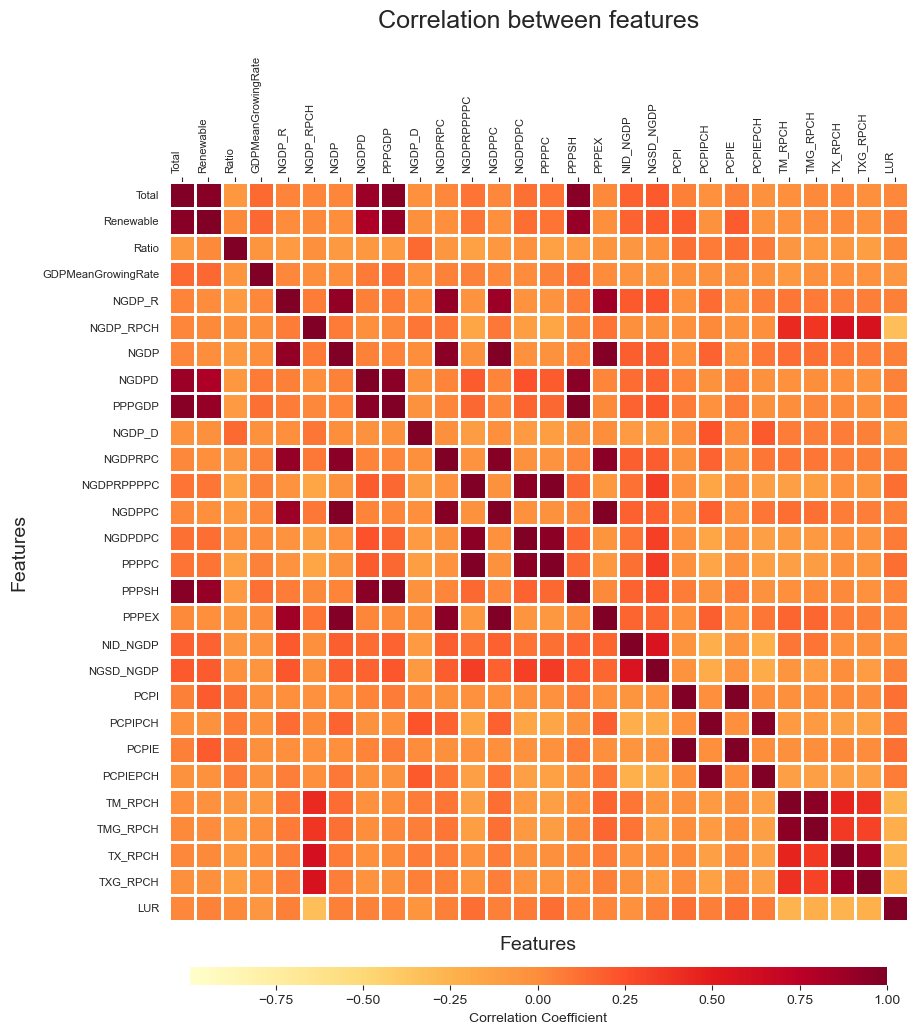

In [168]:
import seaborn as sns
import matplotlib.pyplot as plt

# 调整图像大小
plt.figure(figsize=(15, 12))

# 绘制热力图
ax = sns.heatmap(df_corr, cmap="YlOrRd", linewidths=1, cbar_kws={'label': 'Correlation Coefficient', 'orientation': 'horizontal', 'pad': 0.05, 'aspect': 40, 'shrink': 0.6}, alpha=1, annot=False)

# 设置背景色
ax.set_facecolor('#001000')

# 去掉边框
for _, spine in ax.spines.items():
    spine.set_visible(False)

# 调整字体大小
ax.tick_params(axis='both', which='both', labelsize=12)

# 添加标题和标签
ax.set_title('Correlation between features', fontsize=18, pad=20)
ax.set_xlabel('Features', fontsize=14, labelpad=10)
ax.set_ylabel('Features', fontsize=14, labelpad=10)

# 调整方块大小和间距
ax.invert_yaxis()
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, horizontalalignment='right', fontsize=8)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, horizontalalignment='right', fontsize=8)
ax.set_ylim(len(df.columns), 0)
ax.set_xlim(0, len(df.columns))
ax.set_xticks([i+0.5 for i in range(len(df.columns))])
ax.set_yticks([i+0.5 for i in range(len(df.columns))])
ax.set_aspect('equal')

# 调整颜色条的位置和大小
# cbar = ax.collections[0].colorbar
# cbar.ax.tick_params(labelsize=12)
# cbar.ax.set_position([0.1, 0.95, 0.8, 0.03])

# 添加网格线
ax.xaxis.tick_top()
plt.grid(b=True, which='major', color='w', linestyle='-', axis='both')
plt.show()

In [169]:
plt.close()
plt.close()
plt.close()


In [170]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() #实例化
scaler = scaler.fit(df_total_clean) #fit，在这里本质是生成min(x)和max(x)
result = scaler.transform(df_total_clean) #通过接口导出结果
result

array([[1.57016201e-04, 5.18899807e-04, 8.93543201e-01, ...,
        3.60209466e-05, 6.97073088e-01, 5.54105420e-01],
       [2.44075737e-03, 6.52231609e-03, 7.37266744e-01, ...,
        8.23975722e-04, 6.95574493e-01, 4.31351793e-01],
       [6.79485604e-04, 2.47177525e-03, 1.00000000e+00, ...,
        4.14706279e-05, 6.93290173e-01, 3.22238795e-01],
       ...,
       [4.60403165e-04, 2.27804679e-04, 1.35693609e-01, ...,
        3.09036003e-04, 6.93653332e-01, 3.67045974e-01],
       [2.73532917e-02, 4.44342173e-03, 4.48756252e-02, ...,
        1.36221537e-04, 7.02057570e-01, 4.37029374e-01],
       [1.95699941e-03, 6.06471700e-03, 8.54705901e-01, ...,
        8.13816614e-06, 6.97041704e-01, 5.58147088e-01]])

In [171]:
y = result[:,1]
y

array([5.18899807e-04, 6.52231609e-03, 2.47177525e-03, 2.55197727e-03,
       2.00272554e-02, 1.13928624e-03, 7.60211131e-06, 2.77008827e-02,
       2.57839908e-02, 6.57444692e-04, 1.32613833e-04, 1.08911026e-02,
       2.51682407e-06, 9.98099854e-05, 5.46516020e-04, 3.47876540e-03,
       5.21043062e-06, 1.60220741e-06, 2.27956339e-03, 6.26647325e-04,
       1.86841390e-04, 1.66687909e-03, 2.43278209e-01, 3.07513102e-05,
       4.98712645e-07, 5.29008507e-03, 2.78339343e-06, 6.32816103e-05,
       2.03338916e-01, 1.98149885e-02, 1.86900282e-02, 1.00000000e+00,
       1.57876048e-03, 2.37705986e-03, 5.54487606e-03, 4.87036628e-04,
       2.41472904e-02, 0.00000000e+00, 3.28084999e-05, 5.45737665e-03,
       2.77574061e-04, 4.81256493e-03, 1.16375898e-01, 2.79130212e-07,
       9.31131864e-06, 1.09099248e-02, 1.43481442e-03, 3.35442406e-04,
       1.15883480e-02, 1.11950870e-02, 2.06956443e-05, 5.29213482e-02,
       1.32498320e-03, 7.01315541e-03, 1.65663604e-02, 5.80182663e-02,
      

In [172]:
x = np.delete(result,[0,1,2],axis=1)
x

array([[3.36597254e-02, 8.65719482e-05, 4.16788267e-01, ...,
        3.60209466e-05, 6.97073088e-01, 5.54105420e-01],
       [4.51681122e-02, 9.61100244e-05, 2.74375415e-01, ...,
        8.23975722e-04, 6.95574493e-01, 4.31351793e-01],
       [4.00188592e-02, 5.49458130e-05, 3.89903456e-01, ...,
        4.14706279e-05, 6.93290173e-01, 3.22238795e-01],
       ...,
       [2.30556031e-03, 1.51262474e-05, 3.79762694e-01, ...,
        3.09036003e-04, 6.93653332e-01, 3.67045974e-01],
       [1.16877846e-02, 2.81627574e-04, 2.65649643e-01, ...,
        1.36221537e-04, 7.02057570e-01, 4.37029374e-01],
       [1.56815811e-02, 9.02456819e-06, 3.18077972e-01, ...,
        8.13816614e-06, 6.97041704e-01, 5.58147088e-01]])

In [179]:
from sklearn.linear_model import LinearRegression
from sklearn import model_selection
#2.将数据分为训练集和测试集0.35
x_train,x_test,y_train,y_test=model_selection.train_test_split(x,y,test_size=0.2,random_state=1)
linregTr=LinearRegression()
#4.模型训练
linregTr.fit(x_train,y_train)
#5.模型预测
y_train_pred=linregTr.predict(x_train)
y_test_pred=linregTr.predict(x_test)
#分别计算误差，确定是否过拟合；评估模型的泛化能力
from sklearn import metrics
train_err=metrics.mean_squared_error(y_train,y_train_pred)
test_err=metrics.mean_squared_error(y_test,y_test_pred)
print(train_err,"////",test_err)
#6.性能评估
predict_score=linregTr.score(x_test,y_test)#性能评估，决定系数
print('The decision coeficient is:{:.2f}'.format(predict_score))

0.0002182914241909422 //// 0.009289653649028116
The decision coeficient is:0.66
